In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import time
import logging
from sklearn.datasets import fetch_olivetti_faces

logging.basicConfig(level=logging.INFO,format='%(asctime)s %(message)s')
data_home='datasets/'
logging.info('start')
faces=fetch_olivetti_faces(data_home=data_home)
logging.info('end')

2019-06-28 19:06:42,855 start
2019-06-28 19:06:42,895 end


In [3]:
X=faces.data
y=faces.target
targets=np.unique(faces.target)
target_names=np.array(['c%d'% t for t in targets])
target_names

array(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10',
       'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19',
       'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28',
       'c29', 'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37',
       'c38', 'c39'],
      dtype='<U3')

In [4]:
n_targets=target_names.shape[0]
n_samples,h,w=faces.images.shape
print('数据总条数：{}\n目标分类数:{}'.format(n_samples,n_targets))
print('图片的尺寸:{}x{}\n图片的数据的型:{}\n'.format(w,h,X.shape))
print('y的标签值:',y)

数据总条数：400
目标分类数:40
图片的尺寸:64x64
图片的数据的型:(400, 4096)

y的标签值: [ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2
  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7
  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12
 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14
 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17
 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19
 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22
 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
 25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 26 26 27 27 27 27 27
 27 27 27 27 27 28 28 28 28 28 28 28 28 28 28 29 29 29 29 29 29 29 29 29 29
 30 30 30 30 30 30 30 30 30 3

In [5]:
def plot_gallery(images, titles,h,w,n_row=2,n_col=5):
    '''显示图片的阵列'''
    plt.figure(figsize=(2*n_col,2.2*n_row),dpi=144)
    plt.subplots_adjust(bottom=0,left=.01,right=.99,top=.90,hspace=.01)
    for i in range(n_row*n_col):
        plt.subplot(n_row,n_col,i+1)
        oneImage=images[i].reshape((h,w))
        plt.imshow(oneImage, cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.axis=('off')

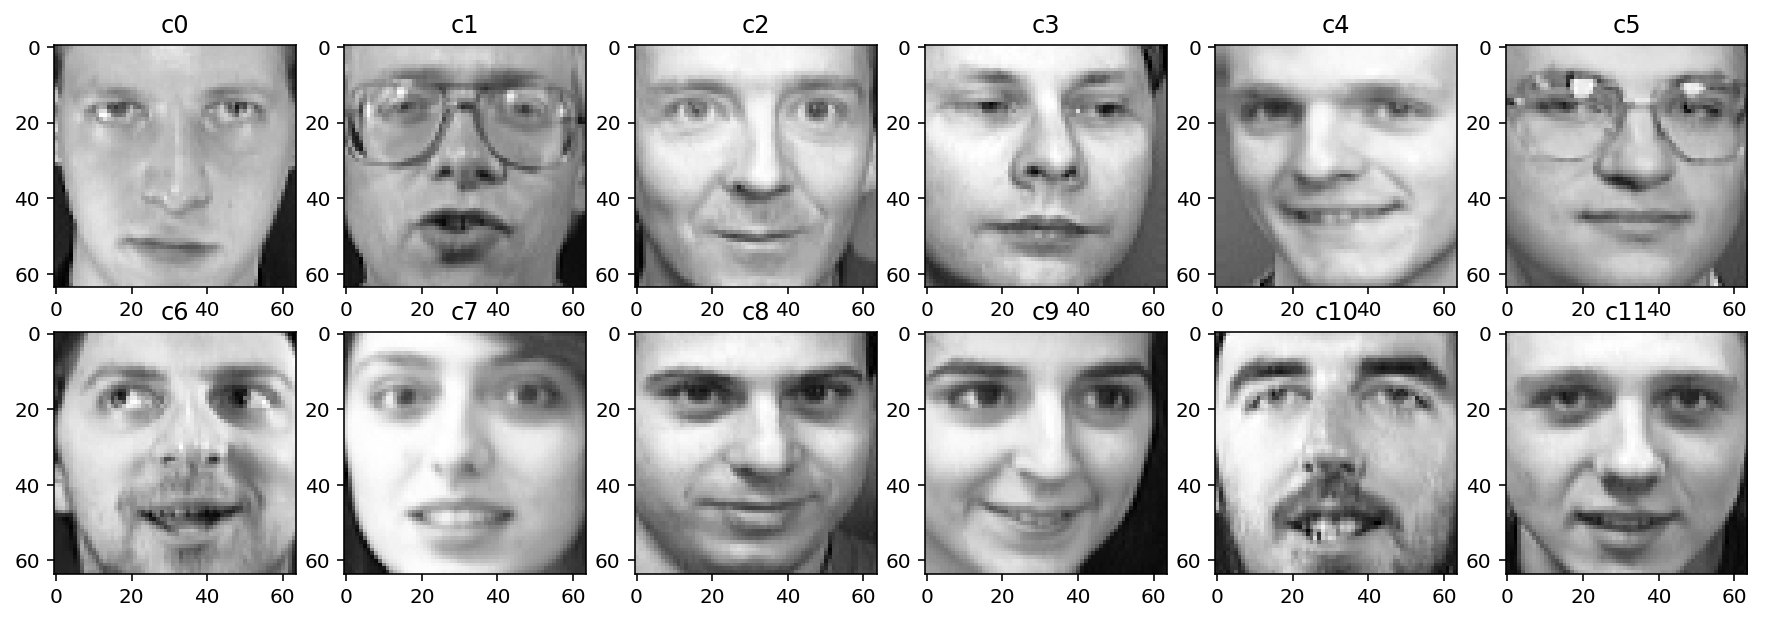

In [6]:
n_row=2
n_col=6

sample_images=None
sample_titles=[]
for i in range(n_targets):
    people_images=X[y==i]  # X[y==i] 取出X中特定人物的所有照片
    # people_images 表示第 i 个的所有图片
    totalImages=people_images.shape[0]
    people_sample_index=np.random.randint(0,totalImages,1) #这个人的所有照片里面随机选一张
    people_sample_images=people_images[people_sample_index, :]#根据随机选出的这个人的一张照片
    #将每个人图片数据拼接，变成一个二维数组，每一行就是一个人的图片
    if sample_images is not None:
        sample_images=np.concatenate((sample_images,people_sample_images),axis=0)
    else:
        sample_images=people_sample_images
        
    #对应的拼接好这个人的标签
    sample_titles.append(target_names[i])
    
plot_gallery(sample_images,sample_titles,h,w,n_row,n_col)

In [7]:
from sklearn.model_selection import train_test_split
#切分数据集为训练集与测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [8]:
from sklearn.svm import SVC

start=time.clock()
print('svc模型训练开始...')
clf=SVC(class_weight='balanced')
clf.fit(X_train,y_train)
print('完成时间:{0:.2f}s'.format(time.clock()-start))

svc模型训练开始...
完成时间:1.40s


In [9]:
y_pred=clf.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred,labels=range(n_targets))
print('混淆矩阵')
print(cm)

混淆矩阵
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [11]:
from sklearn.metrics import classification_report
#打印报表
print(classification_report(y_test,y_pred,target_names=target_names))
'''
40个类别  精确率  召回率 都是0
1.图片这样的数据噪声太大了  模型没办法进行数据拟合
每张图片都有4096个特征  但图片才400个 比特征个数还少
'''

             precision    recall  f1-score   support

         c0       0.00      0.00      0.00         1
         c1       0.00      0.00      0.00         3
         c2       0.00      0.00      0.00         2
         c3       0.00      0.00      0.00         1
         c4       0.00      0.00      0.00         1
         c5       0.00      0.00      0.00         1
         c6       0.00      0.00      0.00         4
         c7       0.00      0.00      0.00         2
         c8       0.00      0.00      0.00         4
         c9       0.00      0.00      0.00         2
        c10       0.00      0.00      0.00         1
        c11       0.00      0.00      0.00         0
        c12       0.00      0.00      0.00         4
        c13       0.00      0.00      0.00         4
        c14       0.00      0.00      0.00         1
        c15       0.00      0.00      0.00         1
        c16       0.00      0.00      0.00         3
        c17       0.00      0.00      0.00   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


'\n40个类别  精确率  召回率 都是0\n1.图片这样的数据噪声太大了  模型没办法进行数据拟合\n每张图片都有4096个特征  但图片才400个 比特征个数还少\n'

In [ ]:
from sklearn.decomposition import PCA

print('探索PCA模型的explained_var')